## PD Controller

# PD Controller

In [18]:
class PDController:
  def __init__(self, Kp, Kd):
    self.Kp = Kp
    self.Kd = Kd

    self.previous_error = 0

  def pd_controller(self, error):
    #TODO: compute control output given error
    derivative = error - self.previous_error# TODO

    u = self.Kp * error + self.Kd * derivative # TODO self.k * error + kd * deriv * ki * integral

    self.previous_error = error
    return u

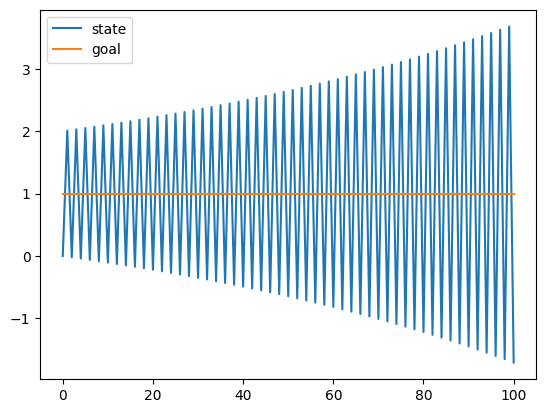

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def velocity_control():
  # Don't use d with position control...
  # Call PD controll with (Kp, Kd)
  sim_controller = PDController(2.01, 0.)

  setpoint = 1
  state = 0
  states = [state]
  setpoints = [setpoint]

  for i in range(100):
    error = setpoint - state
    u = sim_controller.pd_controller(error)
    state = state + u

    states.append(state)
    setpoints.append(setpoint)

  plt.plot(states, label='state')
  plt.plot(setpoints, label='goal')

  plt.legend()
  plt.show()
velocity_control()

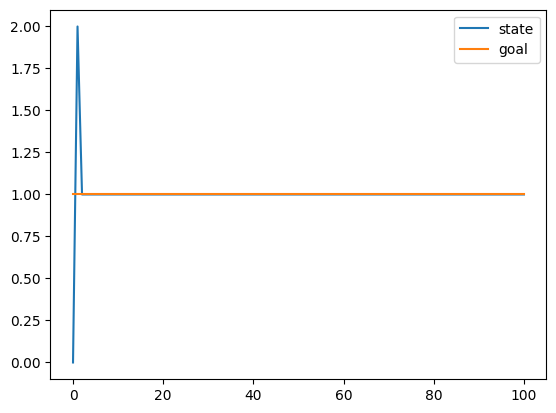

In [20]:
def acceleration_control():
  sim_controller = PDController(1, 1.)

  setpoint = 1
  state = 0
  velocity = 0
  states = [state]
  setpoints = [setpoint]

  for i in range(100):
    error = setpoint - state
    u = sim_controller.pd_controller(error)

    velocity = velocity + u
    state = state + velocity

    states.append(state)
    setpoints.append(setpoint)

  plt.plot(states, label='state')
  plt.plot(setpoints, label='goal')

  plt.legend()
  plt.show()
acceleration_control()

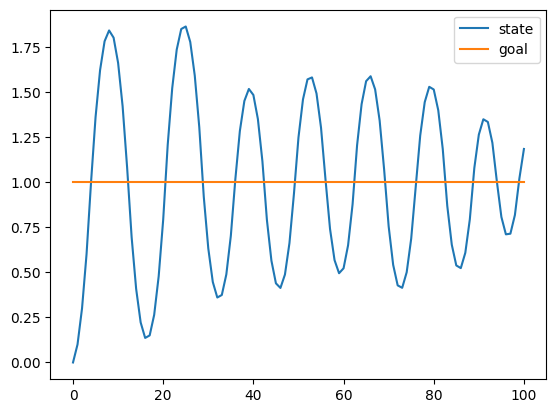

In [21]:
def constrained_acceleration_control():
  sim_controller = PDController(1, 0.1)

  setpoint = 1
  state = 0
  velocity = 0
  states = [state]
  setpoints = [setpoint]

  for i in range(100):
    error = setpoint - state
    u = sim_controller.pd_controller(error)
    u = np.clip(u, -0.1, 0.1) # Restrict acceleration to some maximum and minimum values
    velocity = velocity + u

    state = state + velocity

    states.append(state)
    setpoints.append(setpoint)

  plt.plot(states, label='state')
  plt.plot(setpoints, label='goal')

  plt.legend()
  plt.show()

constrained_acceleration_control()

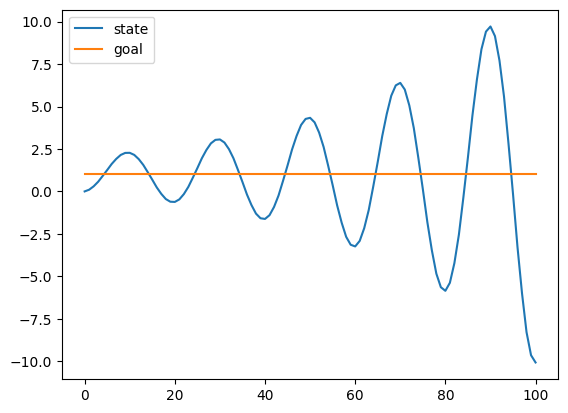

In [22]:
def slow_controller():
  sim_controller = PDController(0.1, 0.)

  setpoint = 1
  state = 0
  velocity = 0
  states = [state]
  setpoints = [setpoint]

  for i in range(100):
    error = setpoint - state
    if i % 2 == 0: # Only get new control once every _ steps
      u = sim_controller.pd_controller(error)
    velocity = velocity + u

    state = state + velocity

    states.append(state)
    setpoints.append(setpoint)

  plt.plot(states, label='state')
  plt.plot(setpoints, label='goal')

  plt.legend()
  plt.show()
slow_controller()

In [23]:
!git clone https://github.com/USC-ACTLab/1952zCS.git
%cd /content/1952zCS/
!git checkout lab4
%env CSW_PYTHON=python3
!pip install numpy matplotlib ipympl vispy pyyaml swig sphinx pyqt5 pytest scipy
!./buildSimOnly.sh
%cd /content/1952zCS/ros_ws/src/crazyswarm/scripts/
%load_ext autoreload
%autoreload 2

Cloning into '1952zCS'...
remote: Enumerating objects: 3695, done.
remote: Total 3695 (delta 0), reused 0 (delta 0), pack-reused 3695 (from 1)
Receiving objects: 100% (3695/3695), 4.51 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (2056/2056), done.
/content/1952zCS
Already on 'lab4'
Your branch is up to date with 'origin/lab4'.
env: CSW_PYTHON=python3
python3 setup.py build_ext --inplace
/content/1952zCS/ros_ws/src/crazyswarm/scripts
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tools to simulate ROS commands

Overly simplistic methods to simulate wand_follower and wand_orbiter nodes. Nothing to modify, just needed for simulation purposes

In [24]:

class Node:
  def __init__(self, name):
    self.name = name
    self.subscribers = {}

  def create_subscription(self, msg_type, topic_name, callback_fn, queue):
    self.subscribers[topic_name] = callback_fn

  def create_timer(self, rate, callback_fn):
    self.timer_callback = callback_fn
    self.rate = rate

class TFMessage:
  pass

class Transform:
  pass

class Joy:
  pass

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

def run_follower(node):
    for i in range(10000):
      if i % int(1/node.rate) == 0:
        node.timer_callback()

      if i % 5 == 0:
        x, y, z = np.sin(i/(500*np.pi)), 0.5*np.cos(i/(500*np.pi)), 0.5*np.sin(i/(500*np.pi))+1
        transforms = dotdict({'transforms': [dotdict({'child_frame_id': 'wand', 'transform': dotdict({'translation': dotdict({'x': x, 'y': y, "z": z}), 'rotation': dotdict({'w': 1, 'x': 0, 'y': 0, 'z': 0})})})]})
        node.subscribers['tf'](transforms)

def run_orbiter(node):
    for i in range(10000):
      if i % int(1/node.rate) == 0:
        node.timer_callback()

      if i % 5 == 0:
        x, y, z = np.sin(i/(500*np.pi)), 0.5*np.cos(i/(500*np.pi)), 0.5*np.sin(i/(500*np.pi))+1
        transforms = dotdict({'transforms': [dotdict({'child_frame_id': 'wand', 'transform': dotdict({'translation': dotdict({'x': x, 'y': y, "z": z}), 'rotation': dotdict({'w': 1, 'x': 0, 'y': 0, 'z': 0})})})]})
        node.subscribers['tf'](transforms)

class rclpy_sim:

  def spin(node):
    if node.name == 'wand_follower_node':
      run_follower(node)
    elif node.name == 'wand_orbiter_node':
      run_orbiter(node)
    else:
      print('node {} not implemented'.format(node.name))

# Wand Follower

Moving to position: [287. 198.   1.]
Moving to position: [287. 197.   1.]
Moving to position: [287. 197.   1.]
Moving to position: [287. 195.   1.]
Moving to position: [287. 195.   1.]
Moving to position: [283. 188.   1.]
Moving to position: [283. 188.   1.]
Moving to position: [276. 178.   1.]
Moving to position: [276. 178.   1.]
Moving to position: [266. 168.   1.]
Moving to position: [266. 168.   1.]
Moving to position: [254. 160.   1.]
Moving to position: [254. 160.   1.]
Moving to position: [242. 155.   1.]
Moving to position: [242. 155.   1.]
Moving to position: [231. 153.   1.]
Moving to position: [231. 153.   1.]
Moving to position: [222. 153.   1.]
Moving to position: [222. 153.   1.]
Moving to position: [215. 153.   1.]
Moving to position: [215. 153.   1.]
Moving to position: [209. 155.   1.]
Moving to position: [209. 155.   1.]
Moving to position: [205. 161.   1.]
Moving to position: [205. 161.   1.]
Moving to position: [203. 170.   1.]
Moving to position: [203. 170.   1.]
M

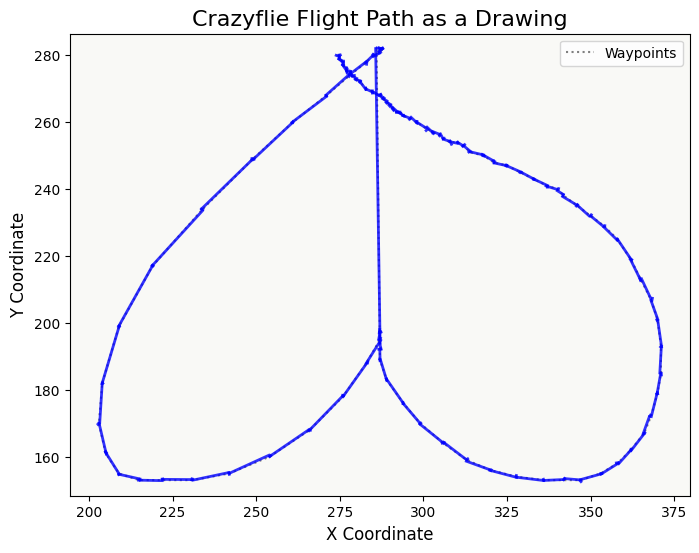

In [34]:
import numpy as np
import csv
from types import SimpleNamespace
import matplotlib.pyplot as plt


class WandFollower:
    def __init__(self, groupState, timeHelper, sim=True):
        """
        Initialize the WandFollower instance.
        Args:
          groupState: A namespace containing Crazyflie state and time helper.
          timeHelper: An instance of the Crazyflie time helper.
          sim: Whether this is a simulation environment.
        """
        self.groupState = groupState
        self.timeHelper = timeHelper
        self.sim = sim
        self.Hz = 10  # Default frequency
        self.wand_pose = None
        self.states = []  # Track states for visualization

    def timer_cb(self):
        """
        Simulate flight updates. In a real setup, this would send commands to the drone.
        """
        if self.wand_pose:
            position, _ = self.wand_pose
            self.states.append(position.tolist())  # Store the current position for visualization
            print(f"Moving to position: {position}")


def load_coordinates_from_csv(file_path):
    """
    Load coordinates from a CSV file and convert them to waypoints.
    Args:
      file_path (str): Path to the CSV file.
    Returns:
      List[Tuple[float, float, float]]: List of 3D waypoints.
    """
    waypoints = []
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            start = [float(row['Start_X']), float(row['Start_Y']), 1.0]  # Z fixed at 1.0
            end = [float(row['End_X']), float(row['End_Y']), 1.0]  # Z fixed at 1.0
            waypoints.append(start)
            waypoints.append(end)
    return waypoints


def run_follower(wand_node, waypoints):
    """
    Run the Crazyflie follower based on preloaded waypoints.
    Args:
      wand_node: The wand follower instance.
      waypoints: List of 3D waypoints.
    """
    for waypoint in waypoints:
        wand_node.wand_pose = (np.array(waypoint), [0, 0, 0, 1])  # Set new goal position
        wand_node.timer_cb()  # Trigger the update manually
        wand_node.timeHelper.sleepForRate(wand_node.Hz)  # Ensure consistent timing


def plot_flight_path_drawing(waypoints, flight_path):
    """
    Plot the flight path in a drawing-like style.

    Args:
      waypoints: List of waypoint coordinates [(x, y, z), ...].
      flight_path: List of Crazyflie's actual flight path [(x, y, z), ...].
    """
    # Extract X, Y for waypoints and flight path
    waypoint_x = [wp[0] for wp in waypoints]
    waypoint_y = [wp[1] for wp in waypoints]

    flight_x = [fp[0] for fp in flight_path]
    flight_y = [fp[1] for fp in flight_path]

    plt.figure(figsize=(8, 6))

    # Plot the waypoints with dotted lines
    plt.plot(waypoint_x, waypoint_y, linestyle=':', color='gray', label='Waypoints', linewidth=1.5)

    # Plot the Crazyflie's flight path with a hand-drawn look
    for i in range(len(flight_x) - 1):
        jitter_x = np.random.normal(0, 0.2, len(flight_x))
        jitter_y = np.random.normal(0, 0.2, len(flight_y))
        plt.plot(
            [flight_x[i] + jitter_x[i], flight_x[i + 1] + jitter_x[i + 1]],
            [flight_y[i] + jitter_y[i], flight_y[i + 1] + jitter_y[i + 1]],
            color='blue',
            linewidth=2,
            alpha=0.8
        )

    plt.title('Crazyflie Flight Path as a Drawing', fontsize=16)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=10)
    plt.axis('equal')
    plt.gca().set_facecolor('#f9f9f6')
    plt.show()


def main():
    sim = True
    if sim:
        from pycrazyswarm import Crazyswarm
        rclpy_sim = None  # Dummy for simulation
        swarm = Crazyswarm(args='--vis=null --sim')
        crazyflies = swarm.allcfs.crazyflies
        timeHelper = swarm.timeHelper

        groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)
    else:
        from tf2_msgs.msg import TFMessage
        from rclpy.node import Node
        import rclpy
        from crazyflie_py import Crazyswarm
        from sensor_msgs.msg import Joy
        swarm = Crazyswarm()
        crazyflies = swarm.allcfs.crazyflies
        timeHelper = swarm.timeHelper

        groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)

    # Load wand coordinates from the CSV
    csv_file_path = "/content/drawing_coordinates.csv"  # Path to your CSV file
    wand_coordinates = load_coordinates_from_csv(csv_file_path)

    wand_node = WandFollower(groupState, timeHelper, sim=sim)
    wand_node.Hz = 10  # Adjust the update frequency if needed

    # Simulation
    run_follower(wand_node, wand_coordinates)

    # Drawing-style visualization
    plot_flight_path_drawing(wand_coordinates, wand_node.states)


if __name__ == "__main__":
    main()


# import numpy as np
# import csv
# from types import SimpleNamespace
# import matplotlib.pyplot as plt
# class WandFollower:
#     def __init__(self, groupState, timeHelper, sim=True):
#         """
#         Initialize the WandFollower instance.
#         Args:
#           groupState: A namespace containing Crazyflie state and time helper.
#           timeHelper: An instance of the Crazyflie time helper.
#           sim: Whether this is a simulation environment.
#         """
#         self.groupState = groupState
#         self.timeHelper = timeHelper
#         self.sim = sim
#         self.Hz = 10  # Default frequency
#         self.wand_pose = None
#         self.states = []  # Track states for visualization

#     def timer_cb(self):
#         """
#         Simulate flight updates. In a real setup, this would send commands to the drone.
#         """
#         if self.wand_pose:
#             position, _ = self.wand_pose
#             self.states.append(position.tolist())  # Store the current position for visualization
#             print(f"Moving to position: {position}")


#     def load_coordinates_from_csv(file_path):
#         """
#         Load coordinates from a CSV file and convert them to waypoints.
#         Args:
#           file_path (str): Path to the CSV file.
#         Returns:
#           List[Tuple[float, float, float]]: List of 3D waypoints.
#         """
#         waypoints = []
#         with open(file_path, 'r') as csvfile:
#             reader = csv.DictReader(csvfile)
#             for row in reader:
#                 start = [float(row['Start_X']), float(row['Start_Y']), 1.0]  # Z fixed at 1.0
#                 end = [float(row['End_X']), float(row['End_Y']), 1.0]  # Z fixed at 1.0
#                 waypoints.append(start)
#                 waypoints.append(end)
#         return waypoints


#     def run_follower(wand_node, waypoints):
#         """
#         Run the Crazyflie follower based on preloaded waypoints.
#         Args:
#           wand_node: The wand follower instance.
#           waypoints: List of 3D waypoints.
#         """
#         for waypoint in waypoints:
#             wand_node.wand_pose = (np.array(waypoint), [0, 0, 0, 1])  # Set new goal position
#             wand_node.timer_cb()  # Trigger the update manually
#             wand_node.timeHelper.sleepForRate(wand_node.Hz)  # Ensure consistent timing


#     def plot_flight_path_drawing(waypoints, flight_path):
#         """
#         Plot the flight path in a drawing-like style.

#         Args:
#           waypoints: List of waypoint coordinates [(x, y, z), ...].
#           flight_path: List of Crazyflie's actual flight path [(x, y, z), ...].
#         """
#         # Extract X, Y for waypoints and flight path
#         waypoint_x = [wp[0] for wp in waypoints]
#         waypoint_y = [wp[1] for wp in waypoints]

#         flight_x = [fp[0] for fp in flight_path]
#         flight_y = [fp[1] for fp in flight_path]

#         plt.figure(figsize=(8, 6))
#         # plt.style.use('seaborn-pastel')

#         # Plot the waypoints with dotted lines
#         plt.plot(waypoint_x, waypoint_y, linestyle=':', color='gray', label='Waypoints', linewidth=1.5)

#         # Plot the Crazyflie's flight path with a hand-drawn look
#         for i in range(len(flight_x) - 1):
#             # Add a bit of randomness for a hand-drawn effect
#             jitter_x = np.random.normal(0, 0.2, len(flight_x))
#             jitter_y = np.random.normal(0, 0.2, len(flight_y))
#             plt.plot(
#                 [flight_x[i] + jitter_x[i], flight_x[i + 1] + jitter_x[i + 1]],
#                 [flight_y[i] + jitter_y[i], flight_y[i + 1] + jitter_y[i + 1]],
#                 color='blue',
#                 linewidth=2,
#                 alpha=0.8
#             )

#         # Customize the plot
#         plt.title('Crazyflie Flight Path as a Drawing', fontsize=16)
#         plt.xlabel('X Coordinate', fontsize=12)
#         plt.ylabel('Y Coordinate', fontsize=12)
#         plt.legend(fontsize=10)
#         plt.axis('equal')  # Maintain aspect ratio
#         plt.grid(False)  # Remove grid for cleaner look

#         # Add light background to mimic paper
#         plt.gca().set_facecolor('#f9f9f6')

#         plt.show()


#     def main():
#         sim = True
#         if sim:
#             from pycrazyswarm import Crazyswarm
#             rclpy_sim = None  # Dummy for simulation
#             swarm = Crazyswarm(args='--vis=null --sim')
#             crazyflies = swarm.allcfs.crazyflies
#             timeHelper = swarm.timeHelper

#             groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)
#         else:
#             from tf2_msgs.msg import TFMessage
#             from rclpy.node import Node
#             import rclpy
#             from crazyflie_py import Crazyswarm
#             from sensor_msgs.msg import Joy
#             swarm = Crazyswarm()
#             crazyflies = swarm.allcfs.crazyflies
#             timeHelper = swarm.timeHelper

#             groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)

#         # Load wand coordinates from the CSV
#         csv_file_path = "/content/drawing_coordinates.csv"  # Path to your CSV file
#         wand_coordinates = load_coordinates_from_csv(csv_file_path)

#         wand_node = WandFollower(groupState, timeHelper, sim=sim)
#         wand_node.Hz = 10  # Adjust the update frequency if needed

#         # Simulation
#         run_follower(wand_node, wand_coordinates)

#         # Drawing-style visualization
#         plot_flight_path_drawing(wand_coordinates, wand_node.states)


#     if __name__ == "__main__":
#         main()


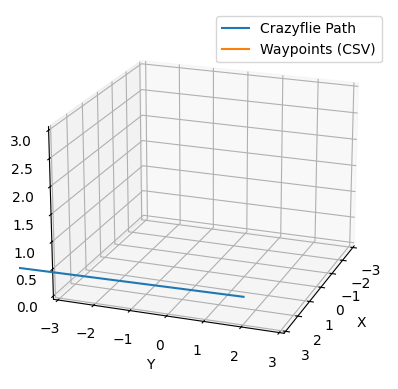

In [ ]:
# import numpy as np
# import csv
# from types import SimpleNamespace
# import matplotlib.pyplot as plt

#     """
#     Load coordinates from a CSV file and convert them to waypoints.
#     Args:
#       file_path (str): Path to the CSV file.
#     Returns:
#       List[Tuple[float, float, float]]: List of 3D waypoints.
#     """
#     waypoints = []
#     with open(file_path, 'r') as csvfile:
#         reader = csv.DictReader(csvfile)
#         for row in reader:
#             start = [float(row['Start_X']), float(row['Start_Y']), 1.0]  # Z fixed at 1.0
#             end = [float(row['End_X']), float(row['End_Y']), 1.0]  # Z fixed at 1.0
#             waypoints.append(start)
#             waypoints.append(end)
#     return waypoints

# def run_follower(wand_node, waypoints):
#     """
#     Run the Crazyflie follower based on preloaded waypoints.
#     Args:
#       wand_node: The wand follower instance.
#       waypoints: List of 3D waypoints.
#     """
#     for waypoint in waypoints:
#         wand_node.wand_pose = (np.array(waypoint), [0, 0, 0, 1])  # Set new goal position
#         wand_node.timer_cb()  # Trigger the update manually
#         wand_node.timeHelper.sleepForRate(wand_node.Hz)  # Ensure consistent timing

# def main():
#     sim = True
#     if sim:
#         from pycrazyswarm import Crazyswarm
#         rclpy_sim = None  # Dummy for simulation
#         swarm = Crazyswarm(args='--vis=null --sim')
#         crazyflies = swarm.allcfs.crazyflies
#         timeHelper = swarm.timeHelper

#         groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)
#     else:
#         from tf2_msgs.msg import TFMessage
#         from rclpy.node import Node
#         import rclpy
#         from crazyflie_py import Crazyswarm
#         from sensor_msgs.msg import Joy
#         swarm = Crazyswarm()
#         crazyflies = swarm.allcfs.crazyflies
#         timeHelper = swarm.timeHelper

#         groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)

#     # Load wand coordinates from the CSV
#     csv_file_path = "/content/drawing_coordinates.csv"  # Path to your CSV file
#     wand_coordinates = load_coordinates_from_csv(csv_file_path)

#     wand_node = WandFollower(groupState, timeHelper, sim=sim)
#     wand_node.Hz = 10  # Adjust the update frequency if needed

#     # Simulation
#     run_follower(wand_node, wand_coordinates)

#     if sim:
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         ax.set_xlim([-3, 3])
#         ax.set_ylim([-3, 3])
#         ax.set_zlim([0, 3])
#         ax.set_xlabel("X")
#         ax.set_ylabel("Y")
#         ax.set_zlabel("Z")
#         ax.view_init(20, 20)

#         xs = [p[0] for p in wand_node.states]
#         ys = [p[1] for p in wand_node.states]
#         zs = [p[2] for p in wand_node.states]

#         ax.plot(xs, ys, zs, label='Crazyflie Path')

#         xs = [p[0] for p in wand_coordinates]
#         ys = [p[1] for p in wand_coordinates]
#         zs = [p[2] for p in wand_coordinates]

#         ax.plot(xs, ys, zs, label='Waypoints (CSV)')
#         plt.legend()
#         plt.show()

# if __name__ == "__main__":
#     main()


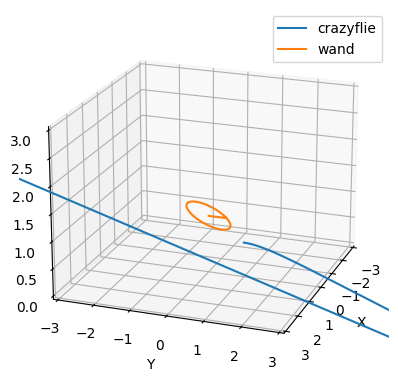

In [ ]:
# import numpy as np
# from blocklyTranslations import *

# class WandFollower(Node):
#   def __init__(self, groupState, timeHelper, max_speed=0.5, update_frequency=20, sim=True):
#     super().__init__('wand_follower_node')
#     crazyflie = groupState.crazyflies[0]
#     self.timeHelper = groupState.timeHelper
#     self.max_speed = max_speed
#     self.Hz = update_frequency
#     self.crazyflie = crazyflie
#     self.timeHelper = timeHelper
#     self.wand_pose = ([0, 0, 1], [0, 0, 0, 1])

#     # create subscriptions
#     self.position_subscriber = self.create_subscription(TFMessage, 'tf', self.pose_callback, 1)
#     self.joy_subscriber = self.create_subscription(Joy, 'joy', self.joy_callback, 1)
#     self.call_timer = self.create_timer(1/self.Hz, self.timer_cb)

#     # We'll use known-to-work parameters for safety, but you can alter for sim
#     self.controller = PDController(-1, 1)

#     # Lists for plotting
#     self.states = []
#     self.goals = []

#   def timer_cb(self):
#     """
#     Executes every time a timer is triggered (rate based on Hz)
#     """
#     # Get state of wand
#     wand_position, wand_rotation = self.wand_pose

#     # TODO: calculate error
#     # position of crazyflie can be accessed with self.crazyflie.position()
#     error = wand_position - self.crazyflie.position() # TODO!

#     # Get Velocity (using PDController)
#     desired_velocity = self.controller.pd_controller(np.array(error))

#     # TODO: Constrain desired velocity to be less than 1 m/s in magnitude. Use np.clip(x, min, max)

#     # use self.send_vel_cmd to send desired velocity to crazyflie
#     desired_velocity = np.array(desired_velocity)
#     desired_velocity[0] = 0 # Don't move in the x direction
#     self.send_vel_cmd(desired_velocity)

#   def send_vel_cmd(self, vel):
#     """
#     send velocity-style command to crazyflie
#     Args:
#       vel: (array-like of float[3]): Velocity meters/second
#     """
#     pos = self.crazyflie.position()
#     desired_position = pos + np.array(vel)*1/self.Hz
#     self.crazyflie.cmdPosition(desired_position)

#     # Required for sim updates, not necessary for real world
#     self.timeHelper.sleepForRate(self.Hz*2)

#     self.states.append(pos)
#     self.goals.append(self.wand_pose)

#   def pose_callback(self, msg):
#     """
#     Pose callback method, called everytime a message is published to the topic /tf
#     updates self.wand_pose to the latest pose of the object named "wand"
#     """

#     # Loop through all transforms (for all objects/crazyflies)
#     for transform in msg.transforms:
#       # Find the transform named "wand"
#       if transform.child_frame_id == 'wand':
#         # position (x, y, z)
#         position = np.array([
#                     transform.transform.translation.x,
#                     transform.transform.translation.y,
#                     transform.transform.translation.z,
#                     ])
#         # Rotation (roll, pitch, yaw, 1)
#         rotation = np.array([
#                     transform.transform.rotation.x,
#                     transform.transform.rotation.y,
#                     transform.transform.rotation.z,
#                     transform.transform.rotation.w,
#                     ])

#         self.wand_pose = (position, rotation)
#         # job done, end method early by calling return
#         return

#   def joy_callback(self, msg):
#     """
#     Shutdown when button on game pad is pressed
#     """
#     if msg.buttons[5] == 1: # Button was pressed
#       self.cf.notifySetpointsStop()
#       self.cf.land(0., 3)

#       rclpy.shutdown() # destory node




# def main():
#     sim = True
#     if sim:
#         # Use sim version of crazyswarm
#         from pycrazyswarm import Crazyswarm
#         # from ros_sim import Node, TFMessage, rclpy, Joy
#         rclpy = rclpy_sim
#         swarm = Crazyswarm(args='--vis=null --sim')
#         crazyflies = swarm.allcfs.crazyflies
#         timeHelper = swarm.timeHelper

#         groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)
#     else:
#         # Use real ROS
#         from tf2_msgs.msg import TFMessage
#         from rclpy.node import Node
#         import rclpy
#         from crazyflie_py import Crazyswarm
#         from sensor_msgs.msg import Joy
#         swarm = Crazyswarm()
#         crazyflies = swarm.allcfs.crazyflies
#         timeHelper = swarm.timeHelper

#         groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)

#     # Load wand coordinates from the CSV
#     csv_file_path = "/content/drawing_coordinates.csv"  # Path to your CSV file
#     wand_coordinates = load_coordinates_from_csv(csv_file_path)

#     allcfs = swarm.allcfs
#     cf = allcfs.crazyflies[0]
#     wand_node = WandFollower(groupState, timeHelper, sim=sim)
#     takeoff(groupState, 1.0, 3)
#     timeHelper.sleep(3.0)

#     # rclpy.spin(wand_node)

#     # Pass the wand coordinates to the simulation
#     run_follower(wand_node, wand_coordinates)

#     if sim:
#       fig = plt.figure()
#       ax = fig.add_subplot(111, projection='3d')
#       ax.set_xlim([-3, 3])
#       ax.set_ylim([-3, 3])
#       ax.set_zlim([0, 3])
#       ax.set_xlabel("X")
#       ax.set_ylabel("Y")
#       ax.set_zlabel("Z")
#       ax.view_init(20, 20)

#       xs = [p[0] for p in wand_node.states]
#       ys = [p[1] for p in wand_node.states]
#       zs = [p[2] for p in wand_node.states]

#       ax.plot(xs, ys, zs, label='crazyflie')

#       xs = [p[0][0] for p in wand_node.goals]
#       ys = [p[0][1] for p in wand_node.goals]
#       zs = [p[0][2] for p in wand_node.goals]

#       ax.plot(xs, ys, zs, label='wand')
#       plt.legend()
#       plt.show()
# main()